<a href="https://colab.research.google.com/github/maab2198/natural_images_classifier/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2
import zipfile
from keras.utils.np_utils import to_categorical

from keras import layers
from keras.layers import Input, Add, Dense, Activation,Dropout,MaxPool2D, Flatten, Conv2D, AveragePooling2D,SeparableConv2D,GaussianNoise, LocallyConnected2D,LeakyReLU, BatchNormalization
from keras.initializers import RandomUniform, RandomNormal, TruncatedNormal
from keras.regularizers import l2,l1
from keras.models import Sequential
from keras.backend import random_normal

from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from keras.preprocessing import image as keras_image


Using TensorFlow backend.


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# # !kaggle datasets list -s  cifar
# # !kaggle datasets download -d  anindya2906/cifar10
# from shutil import unpack_archive
# unpack_archive('cifar10.zip', './')
!kaggle datasets download -d prasunroy/natural-images
from shutil import unpack_archive
unpack_archive('natural-images.zip', '')

natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
labels = ['airplane','car','cat','dog','flower','fruit','motorbike','person']


In [0]:
def load_data():
  X,X_PCA,Y = list(),list(), pd.Series()
  k = 0
  data_path = 'natural_images/'
  dirs = os.listdir(data_path)
  dirs.sort()

  for d in dirs:
    new_path = os.path.join(data_path,d)
    files = os.listdir(new_path)
    for f in files:
       if f.endswith(".jpg"):
        read_img = cv2.imread(os.path.join(new_path,f))
        rgb_flower_image = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
        rgb_flower_image = cv2.resize(rgb_flower_image,(32,32))
        rgb_im_PCA = rgb_flower_image.reshape((rgb_flower_image.shape[0],-1)).reshape((1,-1))
        X_PCA.append(rgb_im_PCA)
        X.append(rgb_flower_image)
        Y = Y.append(pd.Series([k]))
    k+=1

  X = np.array(X)

  Y_PCA = np.array(Y)

  Y = to_categorical(Y, 8)
  Y_y = Y
  
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,stratify=Y)
  X_train , X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1,stratify=Y_train)
  
#   X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,stratify=Y)
#   X_train , X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1,stratify=Y_train)

#   X_train=X_train.reshape((X_train.shape[0],1,X_train.shape[1],X_train.shape[2], X_train.shape[3]))
#   X_val=X_val.reshape((X_val.shape[0],1,X_val.shape[1],X_val.shape[2], X_val.shape[3]))
#   X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1], X_test.shape[2], X_test.shape[3]))
  #X = np.asarray(X).reshape(-1, img_size, img_size, 3) / 255
  #y = np.asarray(y).reshape(-1, 1)

  return X_train, Y_train, X_val, Y_val, X_test, Y_test


In [0]:

X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data()
# Y_val= Y_val.reshape(-1, 1)
# [X_train.shape, Y_val.shape]

In [0]:
def le_net():
    model = Sequential()

    model.add(Conv2D(filters=6, 
                     kernel_size=(5, 5), 
                     strides=(1, 1), 
                     padding='valid',
                     activation='tanh', 
                     input_shape=(28,28,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=16, 
                     kernel_size=(5, 5), 
                     strides=(1, 1),
                     padding='valid', 
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])
    return model
# model_cnn = le_net()
# model.summary()

In [0]:
def cnn():
  cnn = Sequential()
  init_w = RandomUniform(minval=-0.05, maxval=0.05, seed=1)
  kernelSize = (3, 3)
  ip_activation = 'relu'
  
  cnn.add(SeparableConv2D(filters=64, kernel_size=kernelSize,
                     input_shape=(32,32,3), activation=ip_activation,
                     kernel_initializer=init_w, bias_initializer=init_w))
  cnn.add(Conv2D(filters=64, kernel_size=kernelSize,
                      kernel_initializer=init_w, bias_initializer=init_w))
  cnn.add(LeakyReLU(alpha=0.3))
  cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
  cnn.add(Dropout(0.2))
  cnn.add(BatchNormalization())
  
  cnn.add(Conv2D(filters=64, kernel_size=kernelSize,
                      kernel_initializer=init_w, bias_initializer=init_w))
  cnn.add(LeakyReLU(alpha=0.3))
  cnn.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

  cnn.add(BatchNormalization())
  
  cnn.add(SeparableConv2D(filters=64, kernel_size=kernelSize,
                     activation=ip_activation,
                     kernel_initializer=init_w, bias_initializer=init_w))
  cnn.add(LocallyConnected2D(filters=64, kernel_size=kernelSize,
                      activation=ip_activation,
                      kernel_initializer=init_w, bias_initializer=init_w,kernel_regularizer=l2(0.01)))
 
  cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
  cnn.add(Dropout(0.5))
  cnn.add(Flatten())
  cnn.add(BatchNormalization())
  
  
  cnn.add(Dense(units=64, activation='relu',
                    kernel_initializer=init_w, bias_initializer=init_w))

  cnn.add(Dense(units=8, activation='softmax',
                       kernel_initializer=init_w, bias_initializer=init_w))
  
  cnn.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['acc'])
  return cnn

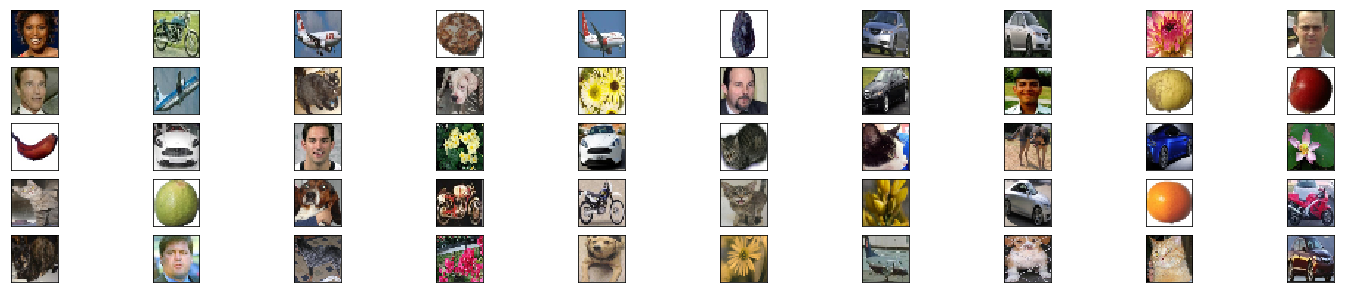

In [0]:
fig = plt.figure(figsize=(25,5))
for i in range(50):
    ax = fig.add_subplot(5,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [0]:
# model_1 = cnn()
# model_1.summary()

model_1 = cnn()
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_5 (Separabl (None, 30, 30, 64)        283       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [0]:
datagen = keras_image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
history_l = model_1.fit_generator(datagen.flow(X_train, Y_train,
                  batch_size=64), epochs=50,steps_per_epoch=186,
                  validation_data=(X_val, Y_val))


Epoch 1/50
186/186 [==============================] - 228s 1s/step - loss: 1.3733 - acc: 0.5525 - val_loss: 1.5154 - val_acc: 0.5733
Epoch 2/50
186/186 [==============================] - 224s 1s/step - loss: 0.9659 - acc: 0.6933 - val_loss: 1.3896 - val_acc: 0.6312
Epoch 3/50
186/186 [==============================] - 223s 1s/step - loss: 0.8353 - acc: 0.7403 - val_loss: 0.7443 - val_acc: 0.7665
Epoch 4/50
186/186 [==============================] - 222s 1s/step - loss: 0.7793 - acc: 0.7636 - val_loss: 0.7910 - val_acc: 0.7762
Epoch 5/50
186/186 [==============================] - 221s 1s/step - loss: 0.7275 - acc: 0.7798 - val_loss: 2.2053 - val_acc: 0.4847
Epoch 6/50
186/186 [==============================] - 103s 554ms/step - loss: 0.6882 - acc: 0.7930 - val_loss: 0.7222 - val_acc: 0.7810
Epoch 7/50
186/186 [==============================] - 98s 525ms/step - loss: 0.6490 - acc: 0.8056 - val_loss: 1.6742 - val_acc: 0.5717
Epoch 8/50
186/186 [==============================] - 107s 576ms

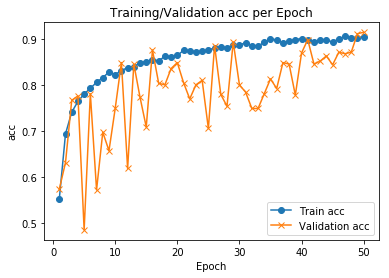

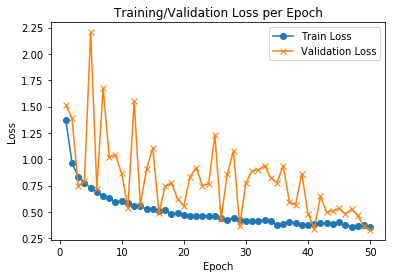

In [0]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + history_l.history['acc'], 'o-')
ax.plot([None] + history_l.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc') 

f, ax = plt.subplots()
ax.plot([None] + history_l.history['loss'], 'o-')
ax.plot([None] + history_l.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
model_1.save("modelCNN.h5")

690/690 [==============================] - 2s 2ms/step


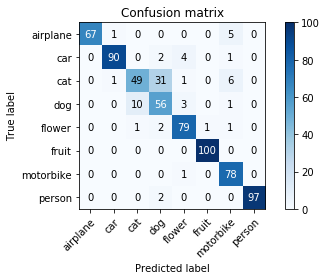

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
     
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Y_pred = model_1.predict(X_test, batch_size=64, verbose=1)
Y_pred_class = np.argmax(Y_pred, axis=1)
Y_test_class = np.argmax(Y_test, axis=1)
plot_confusion_matrix(Y_test_class, Y_pred_class, classes=labels,
                      title='Confusion matrix')
plt.show()

Accuracy: 89.28%
690/690 [==============================] - 1s 2ms/step
Labels: ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'] 
Pred_class: flower


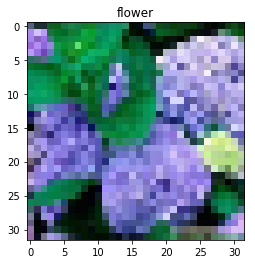

In [0]:

def plot_res(model,X_test,Y_test):
  loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

  print("Accuracy: %.2f%%" % (accuracy*100))

  Y_pred = model.predict(X_test, batch_size=64, verbose=1)
  Y_pred_class = np.argmax(Y_pred, axis=1)

  Y_test_class = np.argmax(Y_test, axis=1)

  r =  np.random.randint(0,Y_test.shape[0])
  plt.title(labels[Y_test_class[r]])
  plt.imshow(X_test[r])

  print('Labels: {} \nPred_class: {}'.format(labels,labels[Y_pred_class[r]]))
  return Y_pred,Y_pred_class,Y_test_class

Y_pred,Y_pred_class,Y_test_class = plot_res(model_1,X_test,Y_test)